In [47]:
import numpy as np
import matplotlib.pyplot as plt

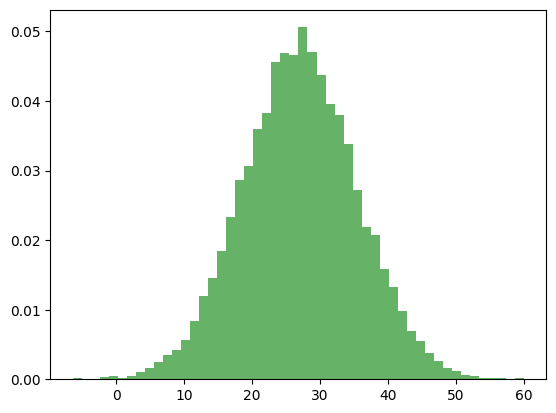

In [48]:
pop = np.random.normal(27, 8.4, 13000) #Tenemos una poblacion de 13000 perros, el peso promedio de un perro es de 27, con una desviacion estandar de 2.4.
plt.hist(pop, bins=50, density=True, alpha=0.6, color='g');

In [49]:
trials = 1000 #Numero de muestras
size = 12 #Taamaño de la muestra
means = [] #Lista para guardar las medias muestrales
for _ in range(trials):
    means.append(np.random.choice(pop, size).mean())

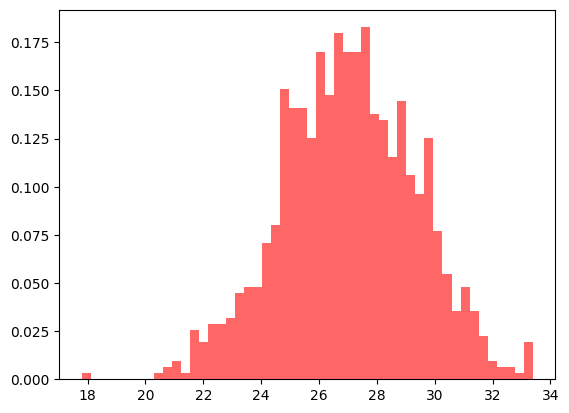

In [50]:
plt.hist(means, bins=50, density=True, alpha=0.6, color='r');

* Como se puede observar, la media muestral (promedio) se distribuye de forma normal (es decir siguen una regularidad normal.).
* En teoria esta simulación es una muestra de lo que se dice de que "A una variable aleatoria normal la describe su media y desviacion estandar"
* Pregunta: ¿Que regularidad sigue 40 existos en 50 ensayos donde la probabilidad de exito es constante con ensayos independientes?: Rpta: LA REGULARIDAD BINOMIAL

In [51]:
def mean(arreglo):
    return sum(arreglo)/len(arreglo) #Media aritmetica

In [52]:
#hallamos la media de las medias muestrales
mean(means) # la media (el promedio) se distribuye de forma normal con el promedio de la poblacion (miu=27)

np.float64(27.019248166310604)

Como se puede ver, el promedio de las medias 26.9 es casi el mismo promedio de la población 27.

* **El valor esperado del promedio muestral es igual al valor esperado de la poblacion (miu)**, es decir la media aritmetica es un buen estimador de la media poblacional
* el promedio muestral es un estimador insesgado, no tiene sesgo, porque cuando realizo todas muchas pruebas, intentos, trials, encuentro lo que busco, en este caso la media poblacional (miu)

### Desviación Estandar
#### Averiguemos una formula para averiguar que tan flacos o gordos son los perros, es decir que tan variable es su peso (para este caso como ejemplo le pusimos 8.4 de varianza)

La varianza muestral tiene su formula:
$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


In [53]:
def std(arreglo, sesgo):
    media = mean(arreglo)
    acum = 0
    for val in arreglo:
        term = (val - media)**2
        acum = acum + term
    return (acum/(len(arreglo)-sesgo))**0.5

#### Entonces ahora hallemos el promedio de las desviaciones estandar de las medias muestrales, y notaremos que el promedio de las desviaciones muestrales es igual al valor esperado para la desviacion estandar de la poblacion (8.4 como se definio al inicio)

In [54]:
#hallamos la desviacion estandar de las medias muestrales para ver si es un valor insesgado
trials = 10000
desviaciones_n = []
desviaciones_n_1 = []
for _ in range(trials):
    sample = np.random.normal(27.4, 8.4, size)
    #desviaciones_n.append(std(sample))
    desviaciones_n_1.append(std(sample, 1)) # estima con mas precisión la desviación estándar de la población

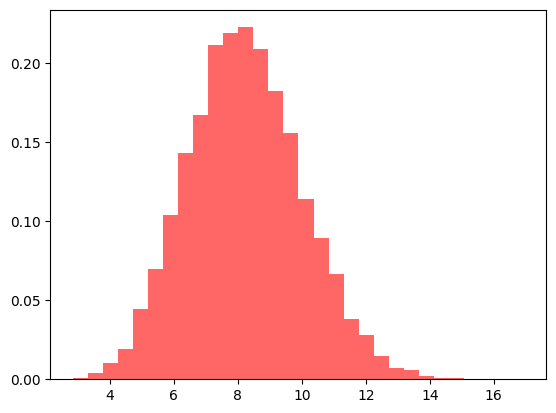

In [55]:
plt.hist(desviaciones_n, bins=30, density=True, alpha=0.6, color='b');
plt.hist(desviaciones_n_1, bins=30, density=True, alpha=0.6, color='r');

In [56]:
#veamos si esto es un estimador insesgado o sesgado
mean(desviaciones_n_1), 8.4

(np.float64(8.233804776677495), 8.4)

- La formula con solo n da como resultado una desviacion estandar muestral sesgado, lo cual indica que no es igual, ni muy cercano al 8.4 (desviacion estandar de la poblacion).

- A diferencia del valor que se acaba de hallar con la formula que contiene como divisor a n-1, dando un resultado insesgado, lo cual indica que es igual o se acerca mucho a 8.4. Y a esto llamos llegar al valor esperado.

- Esto es importante porque cuando tengo una base de datos, yo debo usar la formula matematica que tiene como divisor a n-1, con el objetivo de describir la varianza de los datos.

- Es importante mencionar que la formula que tiene como divisor solo a "n" en la formula de la desviacion estandar, solo lo usan aquellos que quieren demostrar conceptos teoricos, en la practica real usamos n-1.